In [145]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_percentage_error

In [146]:
df=pd.read_csv('demand_train.csv')
df.head()


,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10


In [147]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [148]:
len(df.store.unique())

10

In [149]:
len(df.item.unique())

50

In [150]:
df1=pd.read_csv('demand_test.csv',usecols=['date','store','item'])
df1.head()

,date,store,item
0,01-01-2018,1,1
1,02-01-2018,1,1
2,03-01-2018,1,1
3,04-01-2018,1,1
4,05-01-2018,1,1


In [151]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [152]:
df1.isnull().sum()

date     0
store    0
item     0
dtype: int64

In [153]:
df.tail()

,date,store,item,sales
912995,27-12-2017,10,50,63
912996,28-12-2017,10,50,59
912997,29-12-2017,10,50,74
912998,30-12-2017,10,50,62
912999,31-12-2017,10,50,82


In [154]:
df1.head()

,date,store,item
0,01-01-2018,1,1
1,02-01-2018,1,1
2,03-01-2018,1,1
3,04-01-2018,1,1
4,05-01-2018,1,1


In [155]:
df=df[['date','sales']]
df

,date,sales
0,01-01-2013,13
1,02-01-2013,11
2,03-01-2013,14
3,04-01-2013,13
4,05-01-2013,10
...,...,...
912995,27-12-2017,63
912996,28-12-2017,59
912997,29-12-2017,74
912998,30-12-2017,62


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   sales   913000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 13.9+ MB


In [157]:
df['date'] = pd.to_datetime(df['date'])

In [158]:
df[:30]

,date,sales
0,2013-01-01,13
1,2013-02-01,11
2,2013-03-01,14
3,2013-04-01,13
4,2013-05-01,10
5,2013-06-01,12
6,2013-07-01,10
7,2013-08-01,9
8,2013-09-01,12
9,2013-10-01,9


In [159]:
##qcreating the new column which specify only year and month
df['month_year']=df.date.dt.to_period('M')

In [160]:
df

,date,sales,month_year
0,2013-01-01,13,2013-01
1,2013-02-01,11,2013-02
2,2013-03-01,14,2013-03
3,2013-04-01,13,2013-04
4,2013-05-01,10,2013-05
...,...,...,...
912995,2017-12-27,63,2017-12
912996,2017-12-28,59,2017-12
912997,2017-12-29,74,2017-12
912998,2017-12-30,62,2017-12


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        913000 non-null  datetime64[ns]
 1   sales       913000 non-null  int64         
 2   month_year  913000 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), period[M](1)
memory usage: 20.9 MB


In [162]:
df=df.groupby('month_year')['sales'].sum()

In [163]:
df=pd.DataFrame(df)
df.reset_index(inplace=True)

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  60 non-null     period[M]
 1   sales       60 non-null     int64    
dtypes: int64(1), period[M](1)
memory usage: 1.1 KB


In [165]:
df['month_year'] = df['month_year'].astype(str)


In [166]:
df.head()

,month_year,sales
0,2013-01,536883
1,2013-02,521637
2,2013-03,643749
3,2013-04,667252
4,2013-05,720997


In [167]:
df['month_year']=pd.to_datetime(df.month_year)

In [168]:
df

,month_year,sales
0,2013-01-01,536883
1,2013-02-01,521637
2,2013-03-01,643749
3,2013-04-01,667252
4,2013-05-01,720997
5,2013-06-01,746372
6,2013-07-01,793851
7,2013-08-01,727523
8,2013-09-01,676658
9,2013-10-01,664343


In [169]:
df.set_index('month_year',inplace=True)

In [170]:
df

,sales
month_year,
2013-01-01,536883
2013-02-01,521637
2013-03-01,643749
2013-04-01,667252
2013-05-01,720997
2013-06-01,746372
2013-07-01,793851
2013-08-01,727523
2013-09-01,676658


In [171]:
df=df.asfreq(freq='MS')

In [172]:
df.head()

,sales
month_year,
2013-01-01,536883
2013-02-01,521637
2013-03-01,643749
2013-04-01,667252
2013-05-01,720997


In [173]:
df.tail()

,sales
month_year,
2017-08-01,984531
2017-09-01,918170
2017-10-01,902307
2017-11-01,898137
2017-12-01,784319


[]

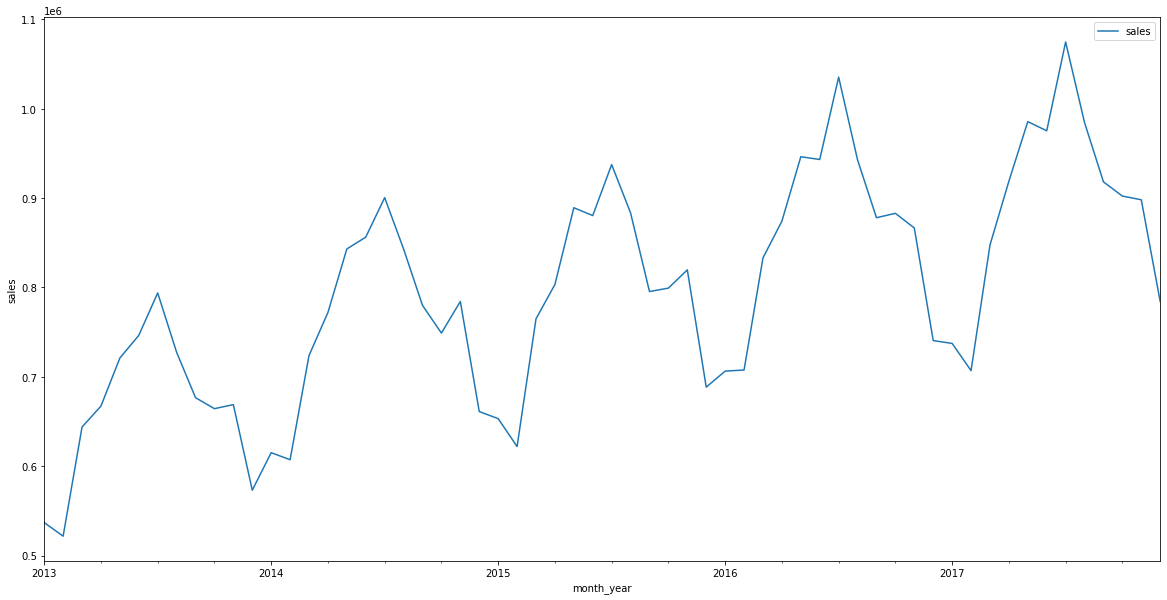

In [174]:
df.plot(legend=True,xlabel='month_year',ylabel='sales',figsize=(20,10))
plt.plot()


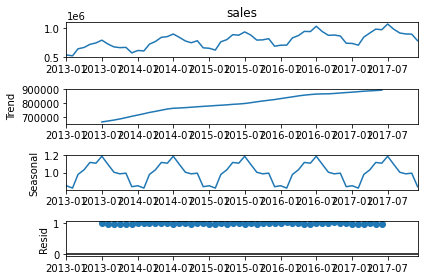

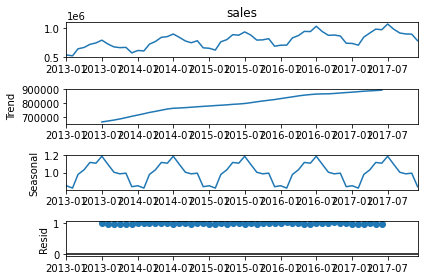

In [175]:
#checking whether the time series has sesional and trend variations 
decompose_result = seasonal_decompose(df['sales'],model='mul')
decompose_result.plot()

Text(0.5, 1.0, 'actuals,predicted data points using holt winters exponentialsmoothing')

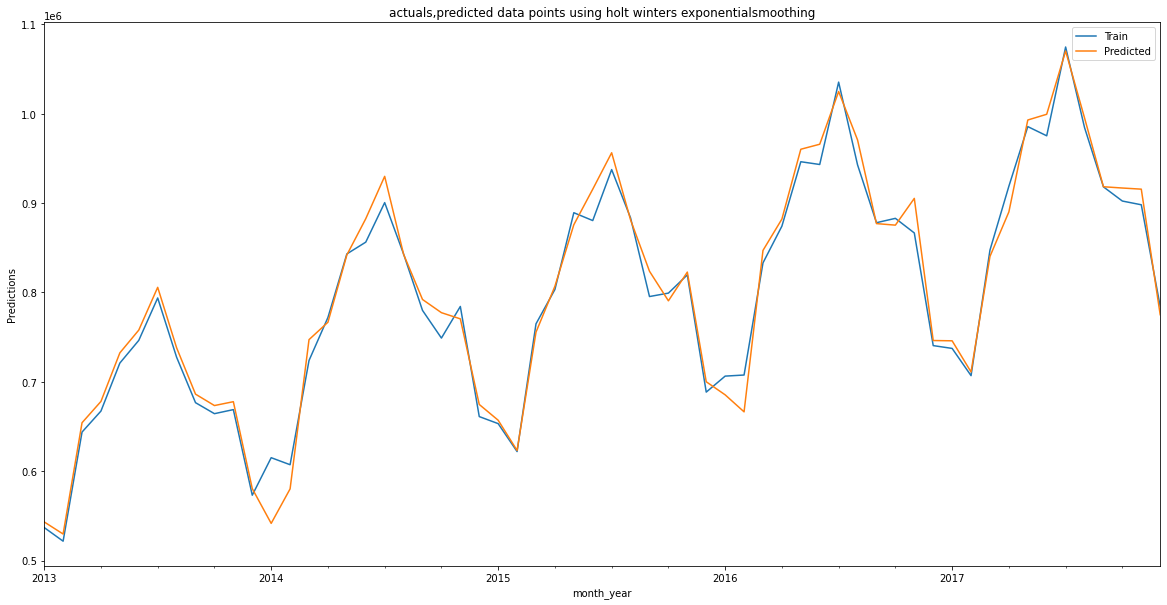

In [176]:
#now fitting the holt-winter model to the dataset and valiudating with the actuals closing prices 
fitted_model=ExponentialSmoothing(df.sales,trend='mul',seasonal='mul',seasonal_periods=12).fit()

test_predictions=fitted_model.predict(start='2013-01-01',end='2017-12-01')
df['sales'].plot(legend=True,label='Train',figsize=(20,10))
test_predictions.plot(label='Predicted',legend=True,ylabel='Predictions')
plt.title('actuals,predicted data points using holt winters exponentialsmoothing')

In [177]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(df.sales,test_predictions)

0.018494700077312874

Text(0.5, 1.0, 'actuals,forecasted data points using holt winters exponentialsmoothing')

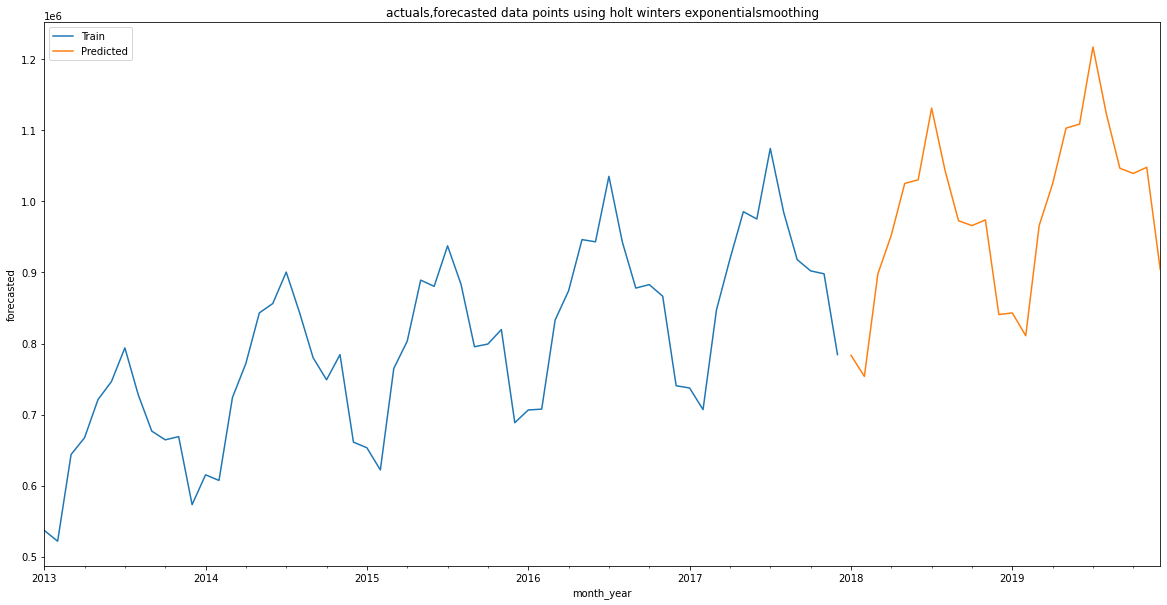

In [178]:
##fitting the model and forecating for further two years 
fitted_model=ExponentialSmoothing(df.sales,trend='mul',seasonal='mul',seasonal_periods=12).fit()

test_predictions=fitted_model.predict(start='2018-01-01',end='2019-12-01')
df['sales'].plot(legend=True,label='Train',figsize=(20,10))
test_predictions.plot(label='Predicted',legend=True,ylabel='forecasted')
plt.title('actuals,forecasted data points using holt winters exponentialsmoothing')

# Forecasting The Demand Store Wise

In [179]:
x=pd.read_csv('demand_train.csv')
x.head()

,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10


In [180]:
x['date'] = pd.to_datetime(x['date'])

In [181]:

x['month_year']=x.date.dt.to_period('M')

In [182]:
x=x.groupby(['month_year','store'])['sales'].sum()

In [183]:
x=pd.DataFrame(x)
x.reset_index(inplace=True)

In [184]:
x['month_year'] = x['month_year'].astype(str)


In [185]:
x.head()

,month_year,store,sales
0,2013-01,1,48694
1,2013-01,2,68952
2,2013-01,3,61300
3,2013-01,4,56213
4,2013-01,5,40597


In [186]:
x['month_year']=pd.to_datetime(x.month_year)

In [187]:
x.head()

,month_year,store,sales
0,2013-01-01,1,48694
1,2013-01-01,2,68952
2,2013-01-01,3,61300
3,2013-01-01,4,56213
4,2013-01-01,5,40597


In [188]:
x=x.pivot(index ='month_year', columns ='store', values ='sales')

In [189]:
## this dataframe has sales values per storewise in monthly frequency
x

store,1,2,3,4,5,6,7,8,9,10
month_year,,,,,,,,,,
2013-01-01,48694,68952,61300,56213,40597,40995,37276,65872,56386,60598
2013-02-01,46957,67549,59286,55392,39786,39248,36343,63782,54459,58835
2013-03-01,57823,83072,73146,67521,49004,49127,44686,78939,67887,72544
2013-04-01,60125,85758,76164,70349,50589,50841,46456,81712,70077,75181
2013-05-01,65471,92777,82092,75807,54709,54701,50017,88321,76112,80990
2013-06-01,67529,95365,84923,78984,56888,56989,51937,91949,78243,83565
2013-07-01,71938,101803,90321,83448,60122,60346,55062,97715,83696,89400
2013-08-01,66144,93133,83195,76232,55295,55623,51008,89069,76228,81596
2013-09-01,61315,86944,76974,70682,51770,51378,46846,83233,71572,75944


In [190]:
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2013-01-01 to 2017-12-01
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       60 non-null     int64
 1   2       60 non-null     int64
 2   3       60 non-null     int64
 3   4       60 non-null     int64
 4   5       60 non-null     int64
 5   6       60 non-null     int64
 6   7       60 non-null     int64
 7   8       60 non-null     int64
 8   9       60 non-null     int64
 9   10      60 non-null     int64
dtypes: int64(10)
memory usage: 5.2 KB


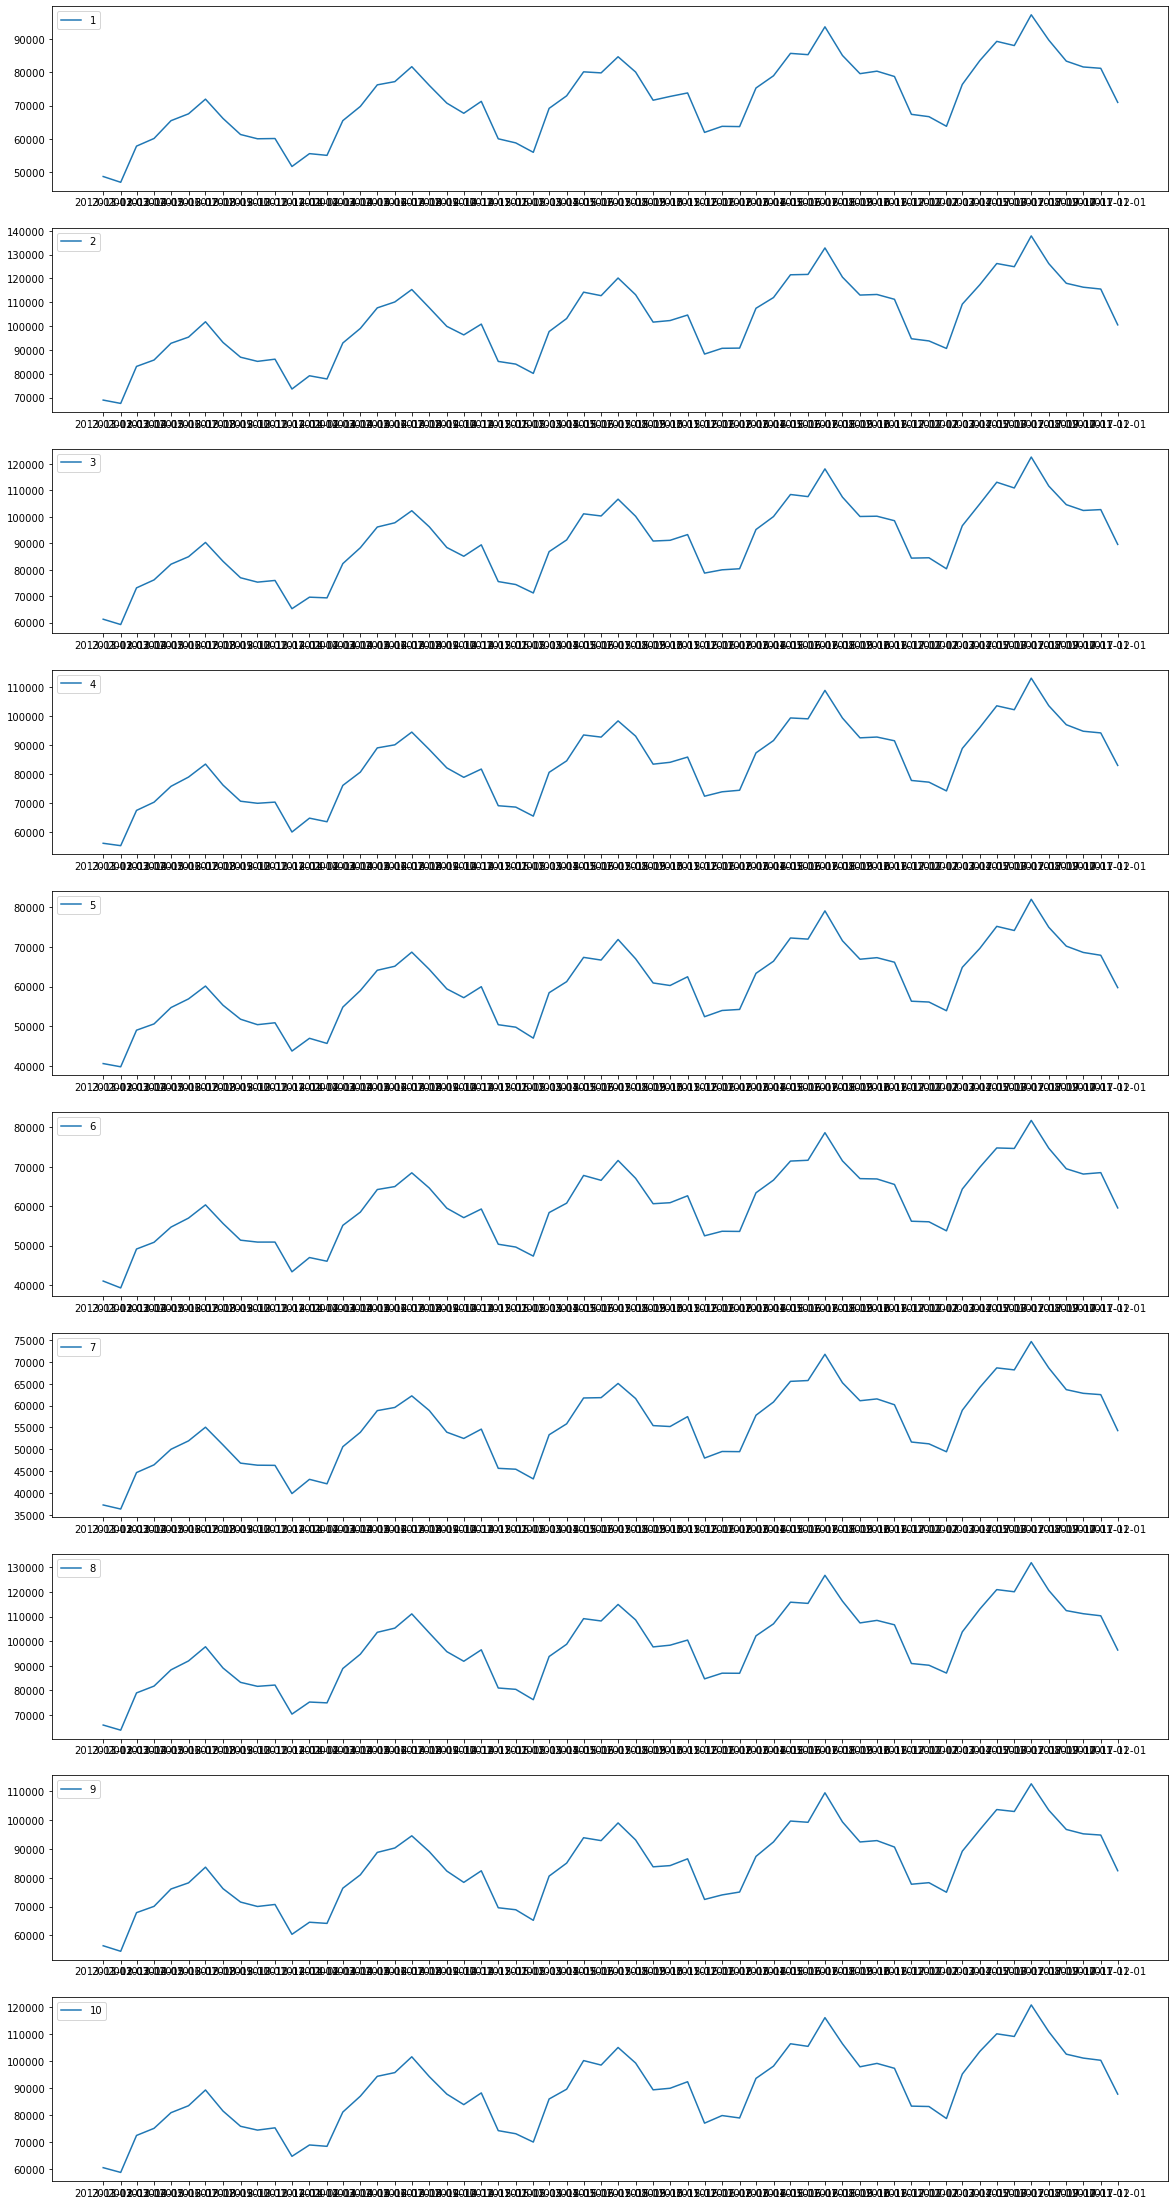

In [191]:
plt.figure(figsize=(20,40))
for i, col in enumerate(x.columns):
    plt.subplot(10,1,i+1)
    plt.plot(x.index, x[col], label=col)
    plt.xticks(x.index)
    plt.legend(loc='upper left')
plt.show()


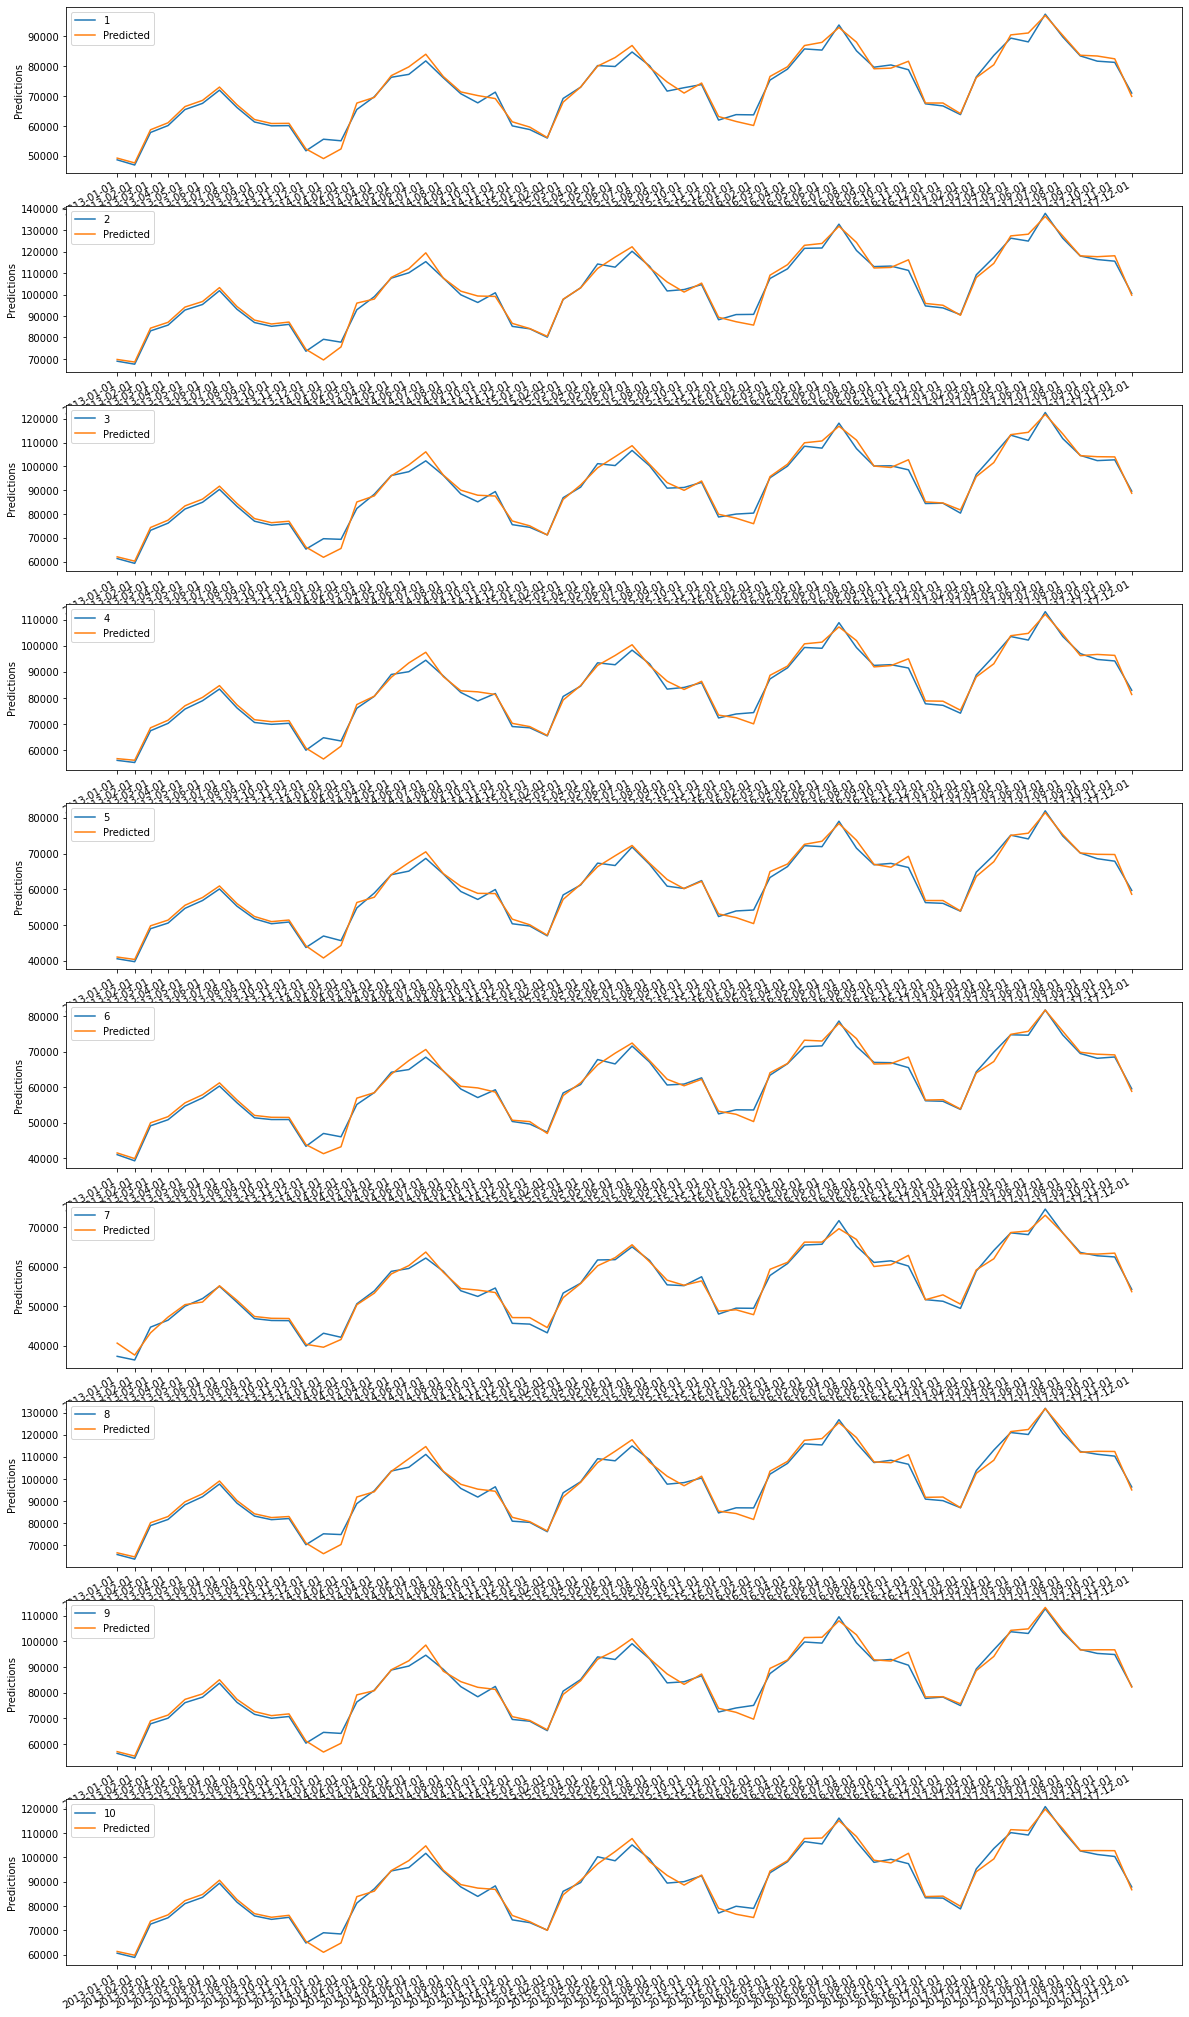

In [203]:
test_predictions = pd.DataFrame()
plt.figure(figsize=(20,40))
for i, col in enumerate(x.columns):
    fitted_model=ExponentialSmoothing(x[col],trend='mul',seasonal='mul',seasonal_periods=12).fit()

    test_predictions[i+1] = fitted_model.predict(start='2013-01-01',end='2017-12-01')
    plt.subplot(10,1,i+1)
    plt.plot(x.index, x[col], label=col)
    test_predictions[i+1].plot(label='Predicted',legend=True,ylabel='Predictions')
    plt.xticks(x.index)
    plt.legend(loc='upper left')
plt.show()

In [204]:
test_predictions.head()

,1,2,3,4,5,6,7,8,9,10
2013-01-01,49270.757548,69752.446003,62023.062091,56866.035645,41078.739991,41476.173132,40627.438011,66648.854408,57049.636761,61304.700997
2013-02-01,47663.388480,68544.879533,60200.018208,56257.359452,40412.450034,39876.814022,37587.618788,64780.081619,55320.976666,59745.389950
2013-03-01,58728.311426,84346.635264,74337.827098,68655.027041,49816.889963,49971.614163,43237.788558,80240.364743,69042.200270,73726.563449
2013-04-01,61057.191757,87061.030512,77402.105774,71539.290645,51413.603817,51709.584666,47238.605797,83035.671324,71278.327769,76385.243074
2013-05-01,66461.725535,94152.857672,83398.874861,77070.117778,55563.147892,55601.970931,50400.838170,89691.385351,77396.933079,82232.569577


In [197]:
x.head()

store,1,2,3,4,5,6,7,8,9,10
month_year,,,,,,,,,,
2013-01-01,48694,68952,61300,56213,40597,40995,37276,65872,56386,60598
2013-02-01,46957,67549,59286,55392,39786,39248,36343,63782,54459,58835
2013-03-01,57823,83072,73146,67521,49004,49127,44686,78939,67887,72544
2013-04-01,60125,85758,76164,70349,50589,50841,46456,81712,70077,75181
2013-05-01,65471,92777,82092,75807,54709,54701,50017,88321,76112,80990


In [205]:
for column in x:
    print(mean_absolute_percentage_error(x[column],test_predictions[column]))
#     print(mean_absolute_percentage_error(x[col],test_predictions[i])*100)

       
    

0.019553426228834755
0.0177496882250406
0.018311627061194914
0.018705359842317366
0.018800195095588022
0.018252050582043728
0.018334552308605753
0.019052389537540494
0.019294899670994493
0.0194263658385926


In [201]:
for i in range(0,x.shape[1]):
    print(mean_absolute_percentage_error(x.iloc[:,i],test_predictions.iloc[:,i]))
#     print(mean_absolute_percentage_error(x[col],test_predictions[i])*100)

       
    

0.019553426228834755
0.0177496882250406
0.018311627061194914
0.018705359842317366
0.018800195095588022
0.018252050582043728
0.018334552308605753
0.019052389537540494
0.019294899670994493
0.0194263658385926


# Forecasting The Demand of Every Item From Each store 

In [57]:
y=pd.read_csv('demand_train.csv')
y.head()

,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10


In [58]:
y['date'] = pd.to_datetime(y['date'])

In [59]:

y['month_year']=y.date.dt.to_period('M')

In [60]:
y

,date,store,item,sales,month_year
0,2013-01-01,1,1,13,2013-01
1,2013-02-01,1,1,11,2013-02
2,2013-03-01,1,1,14,2013-03
3,2013-04-01,1,1,13,2013-04
4,2013-05-01,1,1,10,2013-05
...,...,...,...,...,...
912995,2017-12-27,10,50,63,2017-12
912996,2017-12-28,10,50,59,2017-12
912997,2017-12-29,10,50,74,2017-12
912998,2017-12-30,10,50,62,2017-12


In [61]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        913000 non-null  datetime64[ns]
 1   store       913000 non-null  int64         
 2   item        913000 non-null  int64         
 3   sales       913000 non-null  int64         
 4   month_year  913000 non-null  period[M]     
dtypes: datetime64[ns](1), int64(3), period[M](1)
memory usage: 34.8 MB


In [62]:
y.store=y.store.astype(str)
y.item=y.item.astype(str)

In [63]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        913000 non-null  datetime64[ns]
 1   store       913000 non-null  object        
 2   item        913000 non-null  object        
 3   sales       913000 non-null  int64         
 4   month_year  913000 non-null  period[M]     
dtypes: datetime64[ns](1), int64(1), object(2), period[M](1)
memory usage: 34.8+ MB


In [64]:
# creating the store-item combo 
y['combo']=y.store+'$'+y.item

In [65]:
y.head()

,date,store,item,sales,month_year,combo
0,2013-01-01,1,1,13,2013-01,1$1
1,2013-02-01,1,1,11,2013-02,1$1
2,2013-03-01,1,1,14,2013-03,1$1
3,2013-04-01,1,1,13,2013-04,1$1
4,2013-05-01,1,1,10,2013-05,1$1


In [66]:
# calculating the total sales for every item at each store
y=y.groupby(['month_year','combo'])['sales'].sum()

In [67]:
y=pd.DataFrame(y)
y.reset_index(inplace=True)

In [68]:
y

,month_year,combo,sales
0,2013-01,1$1,408
1,2013-01,1$10,1318
2,2013-01,1$11,1268
3,2013-01,1$12,1321
4,2013-01,1$13,1582
...,...,...,...
29995,2017-12,9$50,2030
29996,2017-12,9$6,1863
29997,2017-12,9$7,1906
29998,2017-12,9$8,2347


In [69]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  30000 non-null  period[M]
 1   combo       30000 non-null  object   
 2   sales       30000 non-null  int64    
dtypes: int64(1), object(1), period[M](1)
memory usage: 703.2+ KB


In [70]:
y['month_year'] = y['month_year'].astype(str)


In [71]:
y['month_year']=pd.to_datetime(y.month_year)

In [72]:
y.head()

,month_year,combo,sales
0,2013-01-01,1$1,408
1,2013-01-01,1$10,1318
2,2013-01-01,1$11,1268
3,2013-01-01,1$12,1321
4,2013-01-01,1$13,1582


In [73]:
y=y.pivot(index ='month_year', columns ='combo', values ='sales')

In [74]:
y

combo,1$1,1$10,1$11,1$12,1$13,1$14,1$15,1$16,1$17,1$18,...,9$46,9$47,9$48,9$49,9$5,9$50,9$6,9$7,9$8,9$9
month_year,,,,,,,,,,,,,,,,,,,,,
2013-01-01,408,1318,1268,1321,1582,1072,1640,456,625,1584,...,1302,480,1126,607,399,1367,1265,1242,1629,1112
2013-02-01,364,1270,1301,1259,1560,1141,1594,462,614,1529,...,1235,463,1114,620,404,1364,1183,1234,1591,1046
2013-03-01,513,1570,1547,1568,1854,1270,1973,596,751,1836,...,1546,611,1304,745,486,1704,1447,1558,1962,1342
2013-04-01,492,1679,1668,1578,1917,1346,2005,612,773,1963,...,1623,551,1431,803,477,1841,1586,1556,2041,1337
2013-05-01,520,1759,1746,1647,2099,1442,2181,668,826,2194,...,1734,630,1502,810,547,1896,1625,1639,2180,1531
2013-06-01,562,1941,1814,1785,2209,1454,2238,688,903,2206,...,1760,678,1477,861,540,1888,1752,1813,2297,1534
2013-07-01,620,1975,1870,1957,2285,1667,2368,743,964,2339,...,1846,669,1631,891,567,2109,1838,1857,2497,1642
2013-08-01,555,1839,1788,1770,2091,1443,2290,646,845,2172,...,1696,641,1471,835,546,1990,1742,1763,2152,1448
2013-09-01,512,1778,1645,1670,1959,1368,2000,543,812,1964,...,1608,623,1388,844,501,1769,1650,1588,2077,1380


In [206]:
test_predictions2 = pd.DataFrame()
plt.figure(figsize=(20,40))
for i, col in enumerate(y.columns):
    fitted_model=ExponentialSmoothing(y[col],trend='mul',seasonal='mul',seasonal_periods=12).fit()

    test_predictions2[i+1] = fitted_model.predict(start='2013-01-01',end='2017-12-01')
#     plt.subplot(10,1,i+1)
#     plt.plot(x.index, x[col], label=col)
#     test_predictions[i].plot(label='Predicted',legend=True,ylabel='Predictions')
#     plt.xticks(x.index)
#     plt.legend(loc='upper left')
# plt.show()

<Figure size 1440x2880 with 0 Axes>

In [207]:
# predicted Value of demand of each item from each store with monthly frequency 
test_predictions2

,1,2,3,4,5,6,7,8,9,10,...,491,492,493,494,495,496,497,498,499,500
2013-01-01,452.247899,1500.470980,1397.033669,1335.458237,1679.440597,1165.948083,1797.334751,471.289018,627.729890,1667.785752,...,1360.577409,518.978074,1228.673482,696.881896,406.505457,1557.302855,1416.890931,1349.076307,1916.293061,1210.722464
2013-02-01,426.341975,1439.086812,1369.763516,1284.534750,1621.953171,1176.258181,1724.753151,472.319128,626.277580,1624.800855,...,1349.577394,499.453789,1149.254910,686.374581,394.731380,1446.174802,1305.718399,1329.781279,1757.534547,1138.582023
2013-03-01,522.496464,1666.174777,1596.083675,1612.121312,1922.265628,1378.358072,2048.148307,558.217345,724.240960,1907.622216,...,1556.968133,612.940358,1351.997807,781.609449,471.507467,1699.472198,1515.176125,1613.783660,2028.104564,1393.493307
2013-04-01,532.951632,1769.226942,1705.991192,1632.662350,2018.578327,1426.245084,2135.592493,610.023854,784.008832,1991.337707,...,1655.248312,617.427833,1434.769627,830.582843,512.397342,1867.529572,1657.710817,1693.459467,2157.695285,1429.759418
2013-05-01,583.426740,1865.002628,1793.191587,1712.728561,2140.334456,1501.860986,2284.378132,661.771289,863.395153,2188.114465,...,1778.906570,679.009279,1531.265735,859.393920,548.368831,2001.542833,1692.812226,1784.573578,2259.255331,1567.226457
2013-06-01,579.470727,1960.252142,1836.334298,1863.645299,2203.787329,1483.221092,2257.872836,659.669792,841.116906,2233.757712,...,1780.980115,672.159105,1572.404765,894.379493,538.079735,1959.936472,1764.955745,1843.460781,2217.620930,1589.093773
2013-07-01,608.355155,2034.208677,1956.497839,2049.381138,2339.242147,1629.595414,2448.075772,721.371686,950.066478,2348.849020,...,1881.382645,710.788104,1649.323849,918.730704,573.372447,2084.258304,1863.505468,1908.143865,2475.334050,1666.492470
2013-08-01,545.397788,1884.663195,1808.936063,1857.535051,2119.160228,1556.891027,2278.389518,673.058176,877.118760,2193.559363,...,1744.776551,659.253271,1520.406391,823.348943,551.766823,1980.619424,1742.387424,1826.403128,2251.170236,1526.315091
2013-09-01,515.623097,1832.219560,1671.790341,1755.017757,1984.681852,1389.363948,2023.268339,603.800247,799.145944,2016.163495,...,1626.320289,618.477485,1396.818559,805.083763,496.389523,1815.896345,1655.579617,1653.445357,2007.963651,1378.662159
2013-10-01,501.831980,1818.389998,1624.217332,1665.835044,1989.951902,1345.538169,2008.726617,578.935604,797.688237,1977.939581,...,1584.619796,578.377701,1373.387104,823.089061,471.135859,1730.390519,1626.274254,1676.840053,2027.218558,1427.956441


In [209]:
#calculating the MAPE for every prediction and actuals valus
for i in range(y.shape[1]):
    print(mean_absolute_percentage_error(y.iloc[:,i],test_predictions2.iloc[:,i]))


       
    
    

0.04703311879953518
0.03896581204457688
0.030599752458650906
0.03866797299463619
0.02751125441108154
0.031889230612784626
0.028559072255613886
0.0272120297022081
0.027186984451955085
0.026871024570009523
0.028247590167783224
0.042682379479899925
0.021528370699268638
0.03036457656318579
0.029512078908823146
0.0419766008928154
0.022580767448080012
0.032992462933223665
0.036522564419902474
0.03508002304883176
0.023760773935391957
0.02642838737451607
0.031222355905417533
0.038634027770964176
0.03128561631178357
0.03893277068529021
0.02871121923796316
0.04196348476179559
0.03372305255488536
0.029390946467752622
0.03747952445443003
0.027766598841953108
0.037181441614361335
0.035175368961614356
0.03396542963439486
0.034147405225702074
0.036620165972111374
0.021936230746042045
0.035962202209532536
0.029341092371978628
0.030525785881161234
0.03625883228993616
0.03374601685999891
0.04313567406318097
0.03961665404868359
0.03371508466293172
0.032547532411683025
0.024102139153614383
0.0267389906584